In [1]:
import pandas as pd
import numpy as np

In [2]:
X = pd.read_csv('iris.csv',header=None).to_numpy()

In [5]:
from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Kmeans Clustering

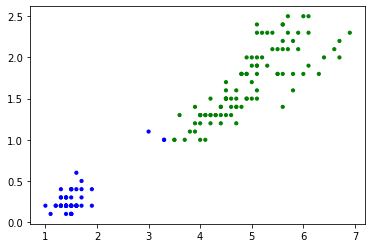

In [9]:
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)

two_means = cluster.MiniBatchKMeans(n_clusters=2)

two_means.fit(X[:,0:4])
y_pred = two_means.labels_.astype(np.int)
plt.subplot(1, 1, 1)
plt.scatter(X[:, 2], X[:, 3], color=colors[y_pred].tolist(), s=10)
plt.show()

## (a) Spectral Clustering

/home/hp/.local/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


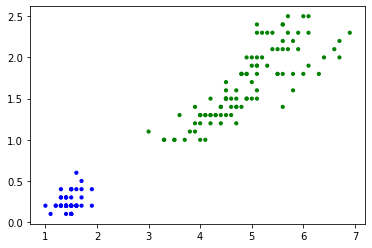

In [11]:
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)

spectral = cluster.SpectralClustering(n_clusters=2,
                                          eigen_solver='arpack',
                                          affinity="nearest_neighbors")

spectral.fit(X[:,0:4])
y_pred = spectral.labels_.astype(np.int)
plt.subplot(1, 1, 1)
plt.scatter(X[:, 2], X[:, 3], color=colors[y_pred].tolist(), s=10)
plt.show()

## (b) DBSCAN clustering

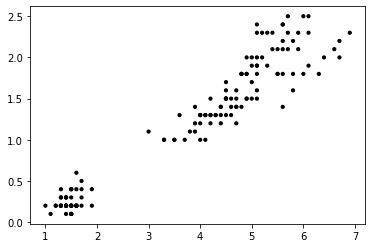

In [12]:
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)

dbscan = cluster.DBSCAN(eps=.1,min_samples=5)

dbscan.fit(X[:,0:4])
y_pred = dbscan.labels_.astype(np.int)
plt.subplot(1, 1, 1)
plt.scatter(X[:, 2], X[:, 3], color=colors[y_pred].tolist(), s=10)
plt.show()

### Influence of Eps and MinPts

In [25]:
Eps = [0.05, 0.1, 0.5, 1, 2]
MinPts = [5, 10, 15, 20, 25, 30]

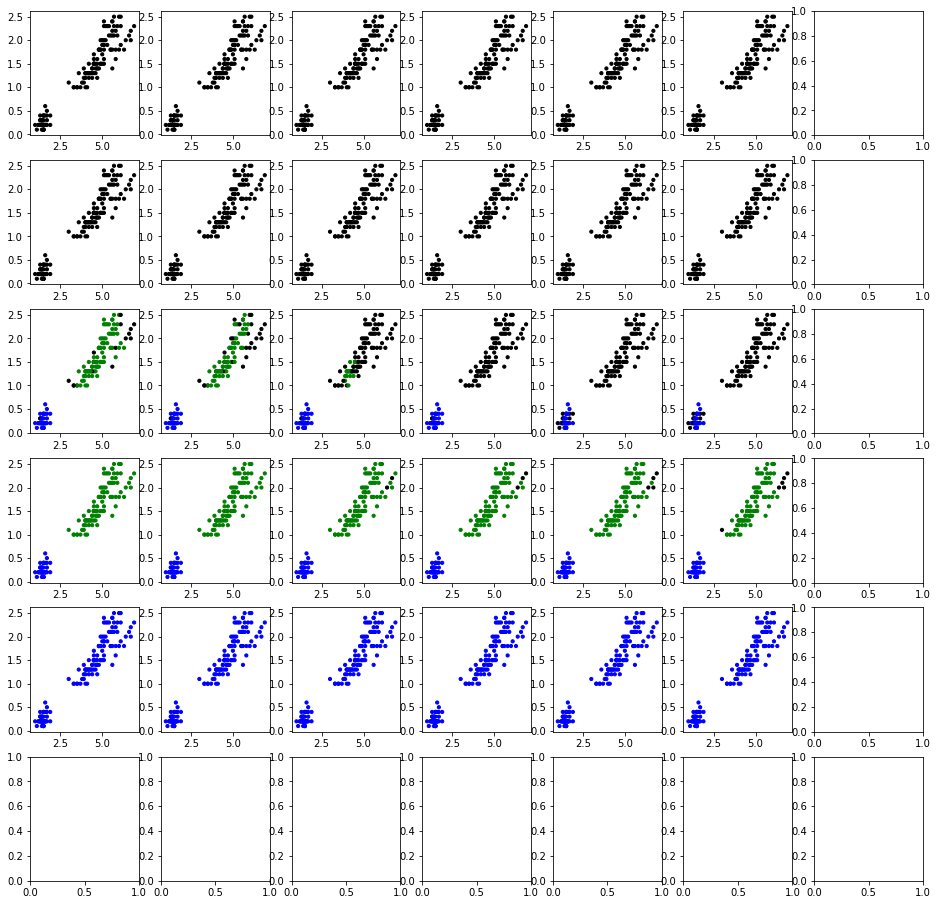

In [27]:
fig, ax = plt.subplots(len(Eps)+1, len(MinPts)+1, figsize=(16,16))

for i in range(len(Eps)):
    for j in range(len(MinPts)):
        dbscan = cluster.DBSCAN(eps = Eps[i], min_samples = MinPts[j])
        
        dbscan.fit(X[:,0:4])
        y_pred = dbscan.labels_.astype(np.int)
        
        ax[i, j].scatter(X[:, 2], X[:, 3], color=colors[y_pred].tolist(), s=10)